In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import set_option

#import the required libraries for plotting
from matplotlib import pyplot
from pandas.tools.plotting import scatter_matrix

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

#import the required ML libraries
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


The following section of code is used to read the files. 

In [2]:
trainFile = pd.read_csv("../input/train.csv")
print(type(trainFile))
gender_submissionFile = pd.read_csv("../input/gender_submission.csv")
testFile = pd.read_csv("../input/test.csv")
trainFile.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Find and print the correlation between variables

In [3]:
set_option('display.width', 100)
set_option('precision', 3)
correlations = trainFile.corr(method = 'pearson')
print(correlations)
sknewness = trainFile.skew()
print(sknewness)

             PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
PassengerId        1.000    -0.005  -0.035  0.037 -0.058 -0.002  0.013
Survived          -0.005     1.000  -0.338 -0.077 -0.035  0.082  0.257
Pclass            -0.035    -0.338   1.000 -0.369  0.083  0.018 -0.549
Age                0.037    -0.077  -0.369  1.000 -0.308 -0.189  0.096
SibSp             -0.058    -0.035   0.083 -0.308  1.000  0.415  0.160
Parch             -0.002     0.082   0.018 -0.189  0.415  1.000  0.216
Fare               0.013     0.257  -0.549  0.096  0.160  0.216  1.000
PassengerId    0.000
Survived       0.479
Pclass        -0.631
Age            0.389
SibSp          3.695
Parch          2.749
Fare           4.787
dtype: float64


**Data Visualization**

Plot the Histogram for all the attributes of the dataframe trainFile. 

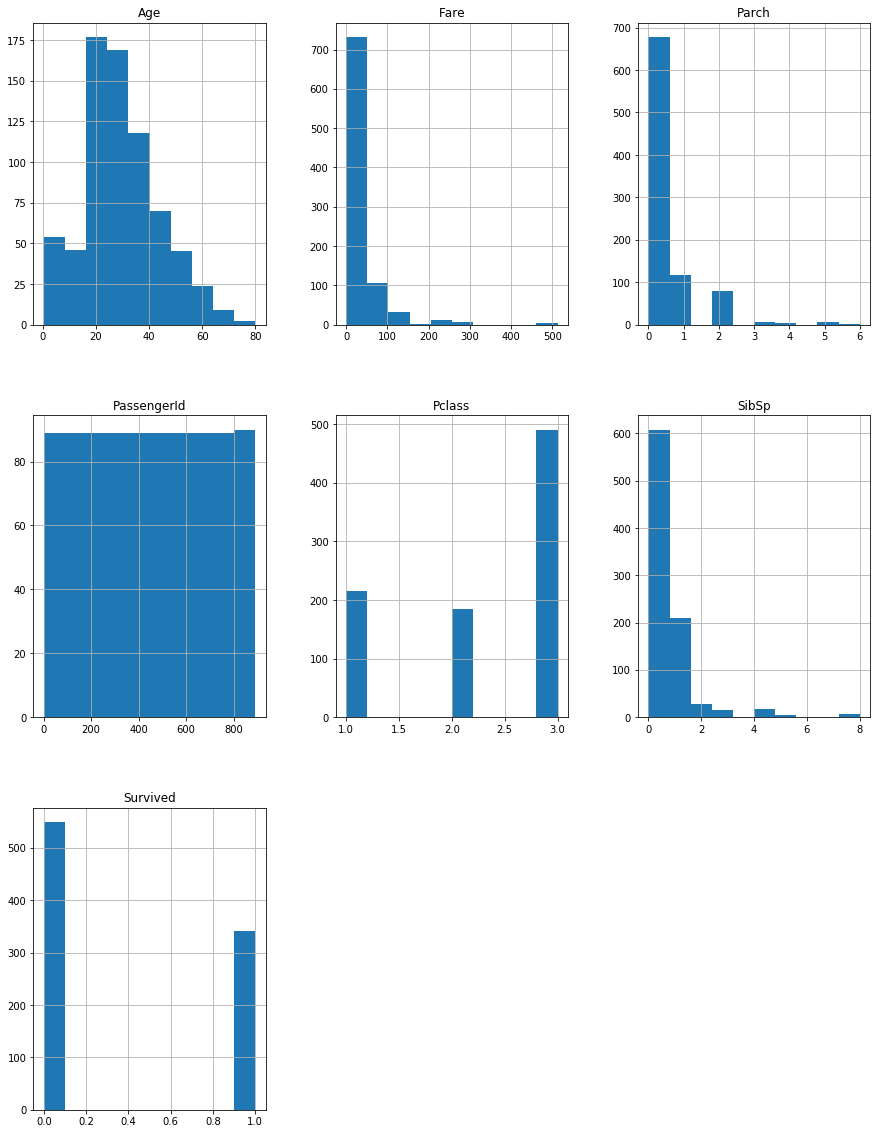

In [4]:
trainFile.hist(figsize = (15,20))
pyplot.show()

Density Plots: Helps to visualize the data more clearly than the histogram.

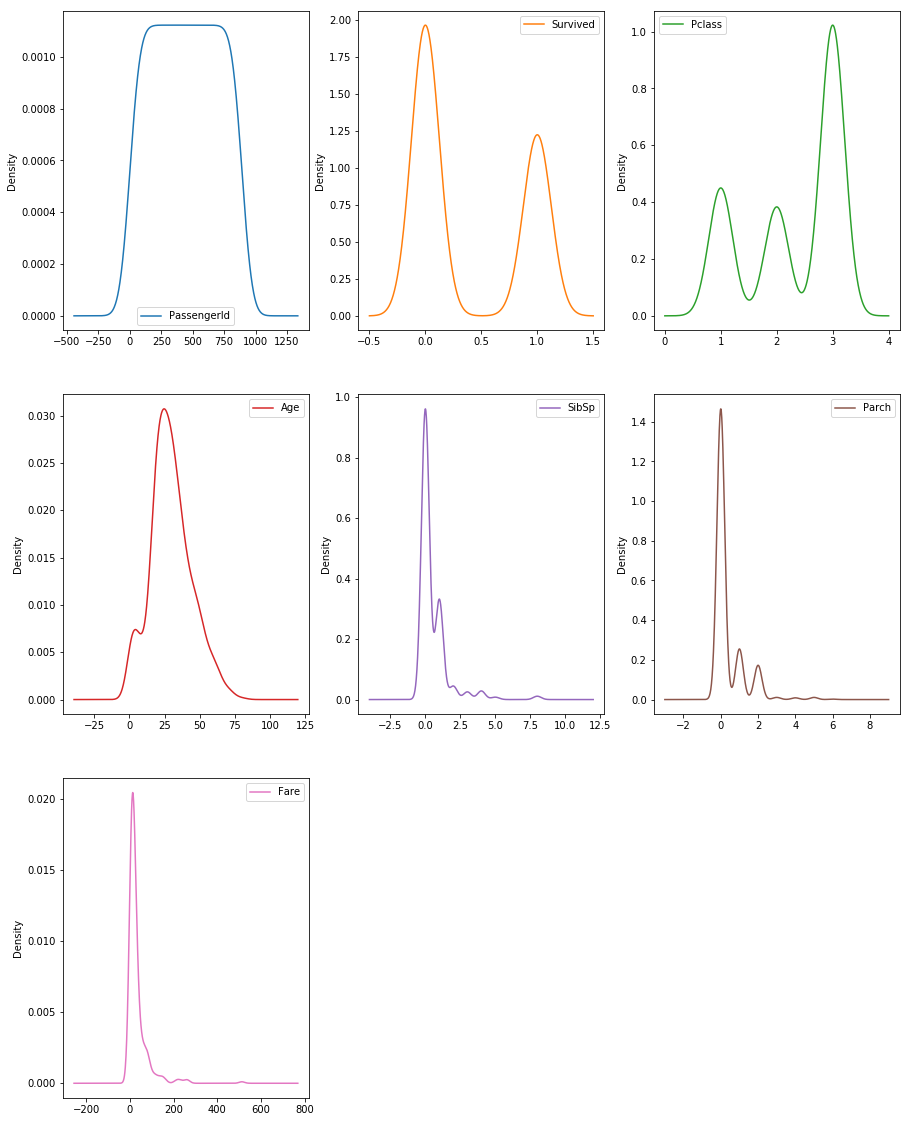

In [5]:
trainFile.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize = (15,20))
pyplot.show()

Box and Whisker Plots

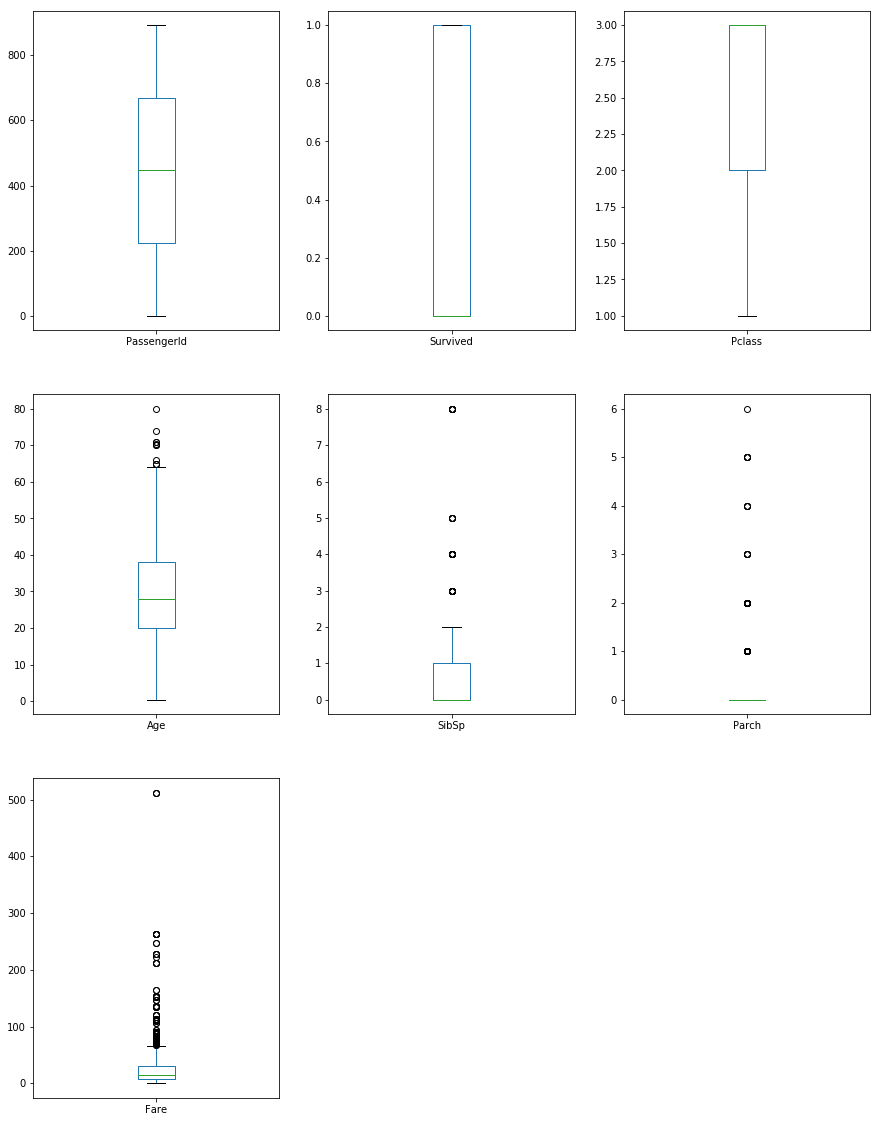

In [6]:
trainFile.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(15,20))
pyplot.show()

MultiVariate Plots: Correlation Matrix Plot, Scatter Diagram Plot

Correlation Matrix Plot:

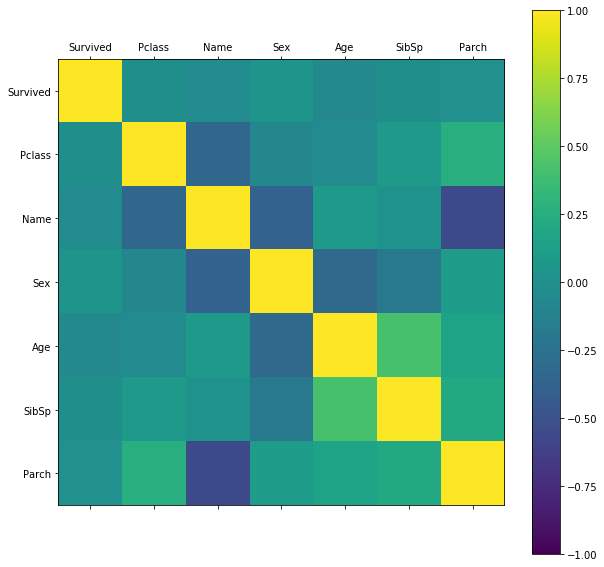

In [7]:
fig = pyplot.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_xticklabels(trainFile.columns)
ax.set_yticklabels(trainFile.columns)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

Scatter Plot:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


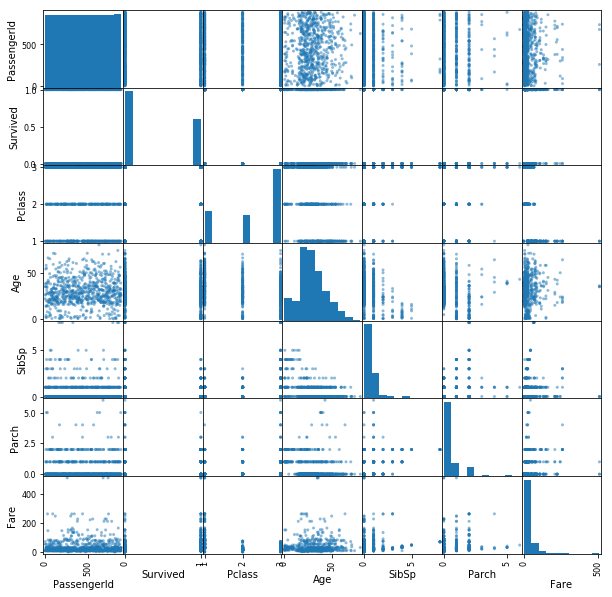

In [8]:
scatter_matrix(trainFile,figsize = (10,10))
pyplot.show()

Find out the count of null values for each attributes.

In [9]:
trainFile.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Keane, Mr. Andrew ""Andy""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [10]:
trainFile.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Describe our train dataset. For Object Types (Strings and Timestamps), describe outputs count, unique, top and freq. 

Since the "Survived" column is binary - 0,1 , the mean value is the percentage of the people who survived.

In [11]:
trainFile[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


Sex and Survived Analysis

In [12]:
trainFile[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742
1,male,0.189


In [13]:
trainFile[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.536
2,2,0.464
0,0,0.345
3,3,0.250
4,4,0.167
5,5,0.000
6,8,0.000


Calculate the median of Age column and fill the missing values of Age with the median. 

In [14]:
fillValues = trainFile["Age"].median(axis=0)
fillValues
trainFile['Age'].fillna(fillValues, inplace = True)
trainFile.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.071,NaN,C


Drop the unwanted columns which do not contribute for analysis.

In [15]:
#trainFile.drop('Cabin', inplace = True)
trainFile.drop(['PassengerId','Cabin','Ticket'],axis = 1, inplace = True)


In [16]:
trainFile.drop(['Name'],axis = 1, inplace = True)
trainFile.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,71.283,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
5,0,3,male,28.0,0,0,8.458,Q
6,0,1,male,54.0,0,0,51.862,S
7,0,3,male,2.0,3,1,21.075,S
8,1,3,female,27.0,0,2,11.133,S
9,1,2,female,14.0,1,0,30.071,C


Convert categorical variables into Numeric variables. We have two categorical variables ie. Sex and Embarked. 

In [17]:
categoricalVar = ['Sex','Embarked']
trainFile[categoricalVar] = trainFile[categoricalVar].apply(lambda x: x.astype('category'))
trainFile[categoricalVar] = trainFile[categoricalVar].apply(lambda x: x.cat.codes)
trainFile.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.250,2
1,1,1,0,38.0,1,0,71.283,0
2,1,3,0,26.0,0,0,7.925,2
3,1,1,0,35.0,1,0,53.100,2
4,0,3,1,35.0,0,0,8.050,2
5,0,3,1,28.0,0,0,8.458,1
6,0,1,1,54.0,0,0,51.862,2
7,0,3,1,2.0,3,1,21.075,2
8,1,3,0,27.0,0,2,11.133,2
9,1,2,0,14.0,1,0,30.071,0


Split the data into training and test datasets. 


In [18]:
#Using Linear Regression
X = trainFile.drop('Survived',axis = 1)
y = trainFile['Survived']
print(type(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
#print(y_test)
#print(y_train)



<class 'pandas.core.series.Series'>


Apply ML algorithms

Logistic Regression

In [21]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [22]:
print("Accuracy using Linear Regression Model is: "+ str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
positives,negatives = confusion_matrix(y_test,y_pred)
TP,FP = positives
FN,TN = negatives
print("Accuracy using confusion matrix is: "+ str((TP+TN)/(TP+FP+FN+TN)))

Accuracy using Linear Regression Model is: 0.8044692737430168
[[90 15]
 [20 54]]
Accuracy using confusion matrix is: 0.8044692737430168


Decision Tree